_____________________________________________________________________________________________________________________________________________________________________________________________

Анализ данных

<Axes: >

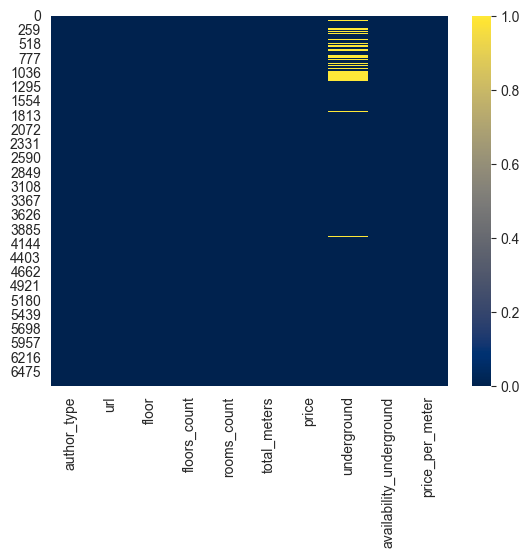

In [15]:
import pandas as pd
import seaborn as sns

path_base = "base.csv"
# path_base = 'result.csv'

df = pd.read_csv(path_base)
sns.heatmap(df.isnull(),cmap='cividis')

________________________________________________________________________________________________________________________________________________________________________________________________________

Поиск выбросов

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

path_base = "base.csv"

data = pd.read_csv(path_base)
df_setect_out=df[['floor', 'floors_count', 'rooms_count', 'total_meters', 'price']]
df_setect_out

outlier_cols = []

for column in df_setect_out.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(15, 5))

# Create box plots for each column
for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'base/base.csv'

__________________________________________________________________________________________________________________________________________________________________________________________________



In [5]:

import pandas as pd

path_base = "base.csv"

df = pd.read_csv(path_base)
df.describe()

,floor,floors_count,rooms_count,total_meters,price,price_per_meter
count,6725.000000,6725.000000,6725.000000,6725.000000,6.725000e+03,6.725000e+03
mean,8.905130,18.155985,2.161487,69.827735,4.605776e+07,5.191268e+05
std,8.763275,12.650964,1.018174,44.361513,8.975945e+07,2.632349e+06
min,1.000000,1.000000,1.000000,0.300000,1.700000e+06,4.950000e+04
25%,3.000000,9.000000,1.000000,40.000000,1.019108e+07,2.323980e+05
50%,6.000000,15.000000,2.000000,56.050000,1.763200e+07,3.333330e+05
75%,12.000000,23.000000,3.000000,82.790000,4.350000e+07,5.666330e+05
max,82.000000,97.000000,4.000000,620.100000,2.418390e+09,2.133333e+08


In [6]:
import pandas as pd

path_base = "base.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()

author_type
real_estate_agent           3417
developer                   2733
realtor                      324
homeowner                    128
representative_developer      70
unknown                       39
official_representative       14
Name: count, dtype: int64

C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_18616\2574993243.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x='author_type', hue='price', data=df,  color='pink')


<Axes: xlabel='author_type', ylabel='count'>

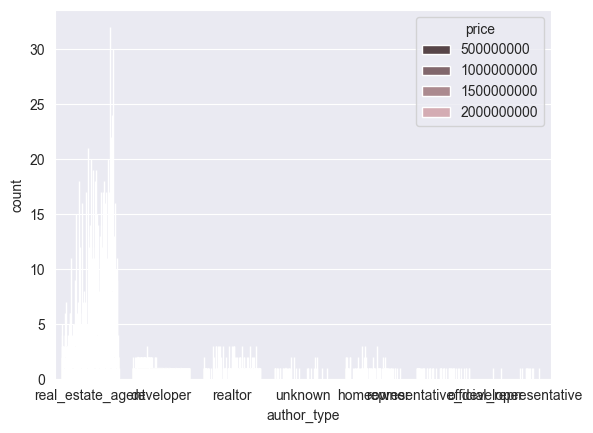

In [14]:
import seaborn as sns

path_base = "base.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()
sns.set_style("darkgrid")
sns.countplot(x='author_type', hue='price', data=df,  color='pink') 

C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_18616\3483275346.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived, color='r', kde=False, bins=np.arange(xmin, xmax, width)) #делаем диаграмку по выжившим пассажирам
C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_18616\3483275346.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

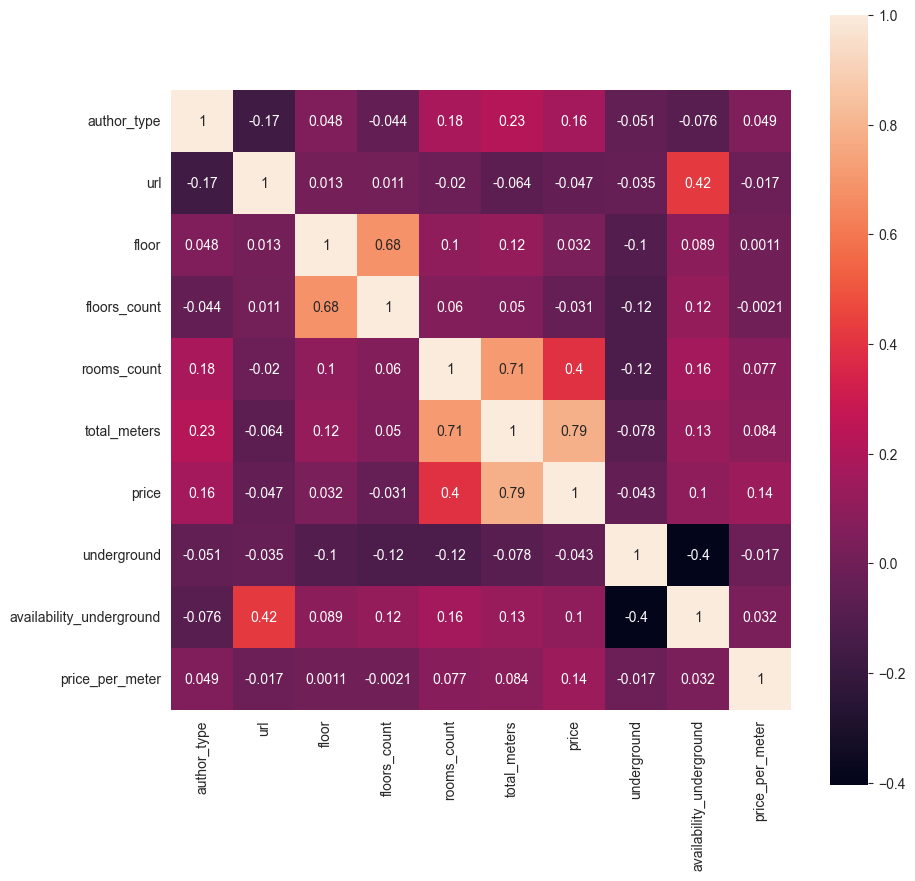

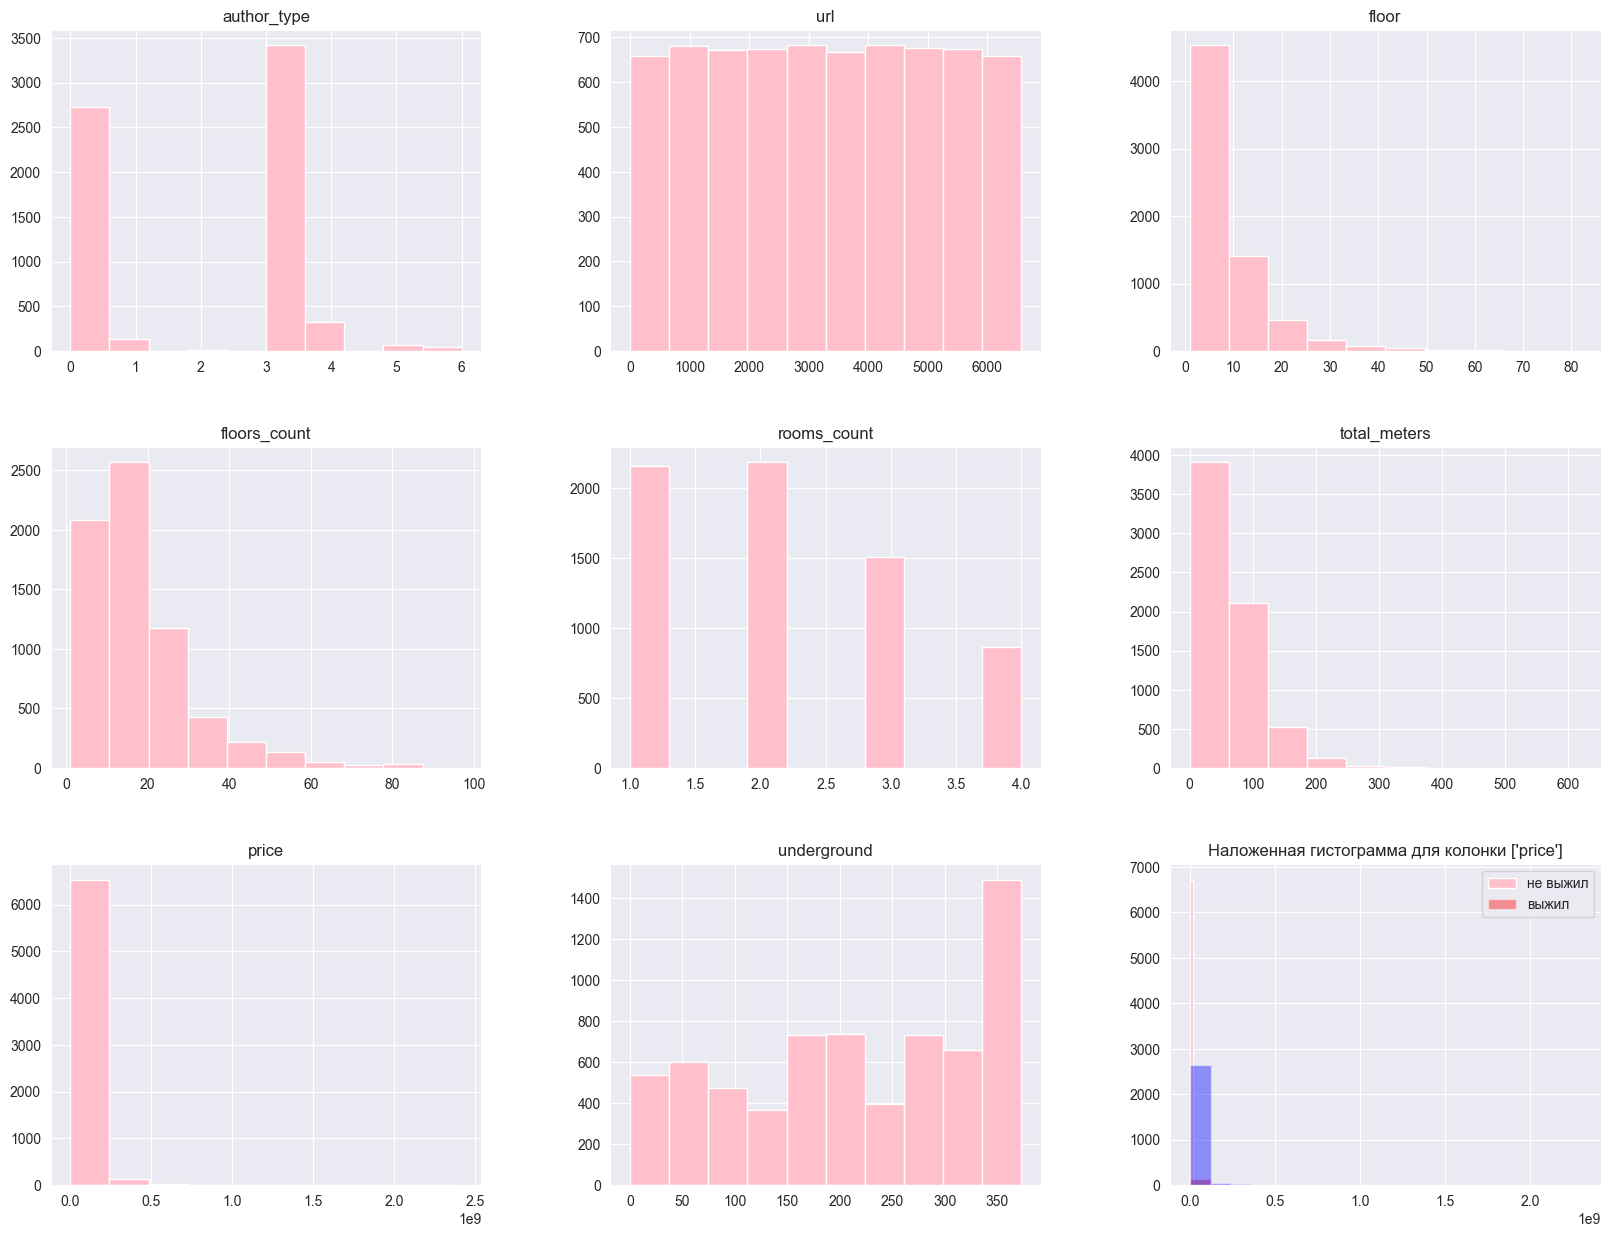

In [13]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#####################################################################################################################

path_base = "base.csv"
df = pd.read_csv(path_base)

#####################################################################################################################

def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

encoded_data.hist(figsize=(20,15), color='pink') #смотрим на красивые диаграммы

#####################################################################################################################

died = list(encoded_data[encoded_data['author_type'] == 0]['price'].dropna()) #создали переменную, которая содержит погибших пассажиров
survived = list(encoded_data[encoded_data['author_type'] == 1]['price'].dropna()) #создали еще одну переменную, но уже для выживших
xmin = min(min(died), min(survived)) #переменная для хранения мин значения
xmax = max(max(died), max(survived)) #переменная для хранения макс значения
width = (xmax - xmin) / 20 #настройка ширины
sns.distplot(survived, color='r', kde=False, bins=np.arange(xmin, xmax, width)) #делаем диаграмку по выжившим пассажирам
sns.distplot(died, color='b', kde=False, bins=np.arange(xmin, xmax, width)) #делаем  2 диаграмку и накладываем
plt.legend(['не выжил', 'выжил']) #обозначим цвета
plt.title('Наложенная гистограмма для колонки {}'.format(['price'])) #заголовок красивый
plt.show() #можно заметить, что люди с возрастом 20-30 выжило куда больше, чем погибло, но с детьми иная ситуация

#####################################################################################################################

# for i, col in enumerate(['Pclass', 'SibSp', 'Parch']): #цикл для колонок
#     plt.figure(i)
#     sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=1.5, color='pink') #тут мы видим влияение класса пассажира, количество братьев и сестер, количество родителей и детей на выживаемость